In [13]:
import pandas as pd

# Path to your file, assuming it might be a CSV despite the .xls extension
data_path = "TravelInsurancePrediction.xls"

# Attempting to read the file as a CSV
try:
    df = pd.read_csv(data_path)
    print(travel_insurance_df.head())
except Exception as e:
    print(f"An error occurred: {e}")


   Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3       

In [17]:
# Summary statistics
print(travel_insurance_df.describe())

        Unnamed: 0          Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean    993.000000    29.650226  9.327630e+05       4.752894         0.277806   
std     573.741812     2.913308  3.768557e+05       1.609650         0.448030   
min       0.000000    25.000000  3.000000e+05       2.000000         0.000000   
25%     496.500000    28.000000  6.000000e+05       4.000000         0.000000   
50%     993.000000    29.000000  9.000000e+05       5.000000         0.000000   
75%    1489.500000    32.000000  1.250000e+06       6.000000         1.000000   
max    1986.000000    35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  


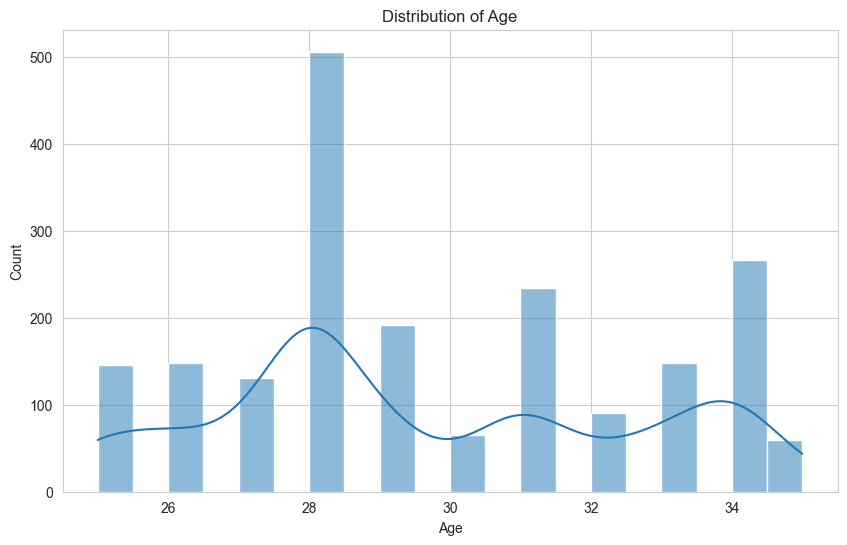

In [18]:

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(travel_insurance_df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

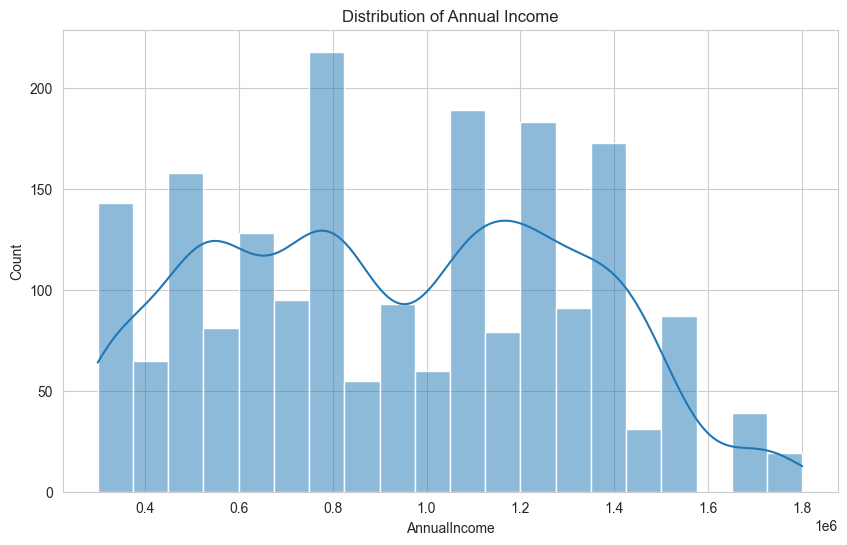

In [20]:


# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(travel_insurance_df['AnnualIncome'], kde=True, bins=20)
plt.title('Distribution of Annual Income')
plt.show()


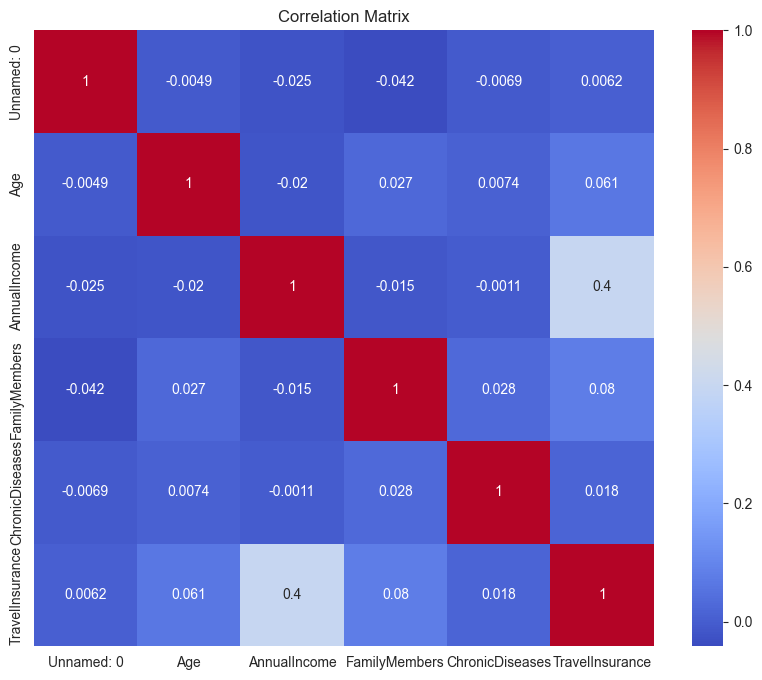

In [19]:

# Checking for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(travel_insurance_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
from scipy.stats import ttest_ind

# Split the data into two groups
group1 = travel_insurance_df[travel_insurance_df['TravelInsurance'] == 1]['AnnualIncome']
group2 = travel_insurance_df[travel_insurance_df['TravelInsurance'] == 0]['AnnualIncome']

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject null hypothesis - there is a significant difference in the mean AnnualIncome between the two groups.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference in the mean AnnualIncome between the two groups.")

T-statistic: 19.257785253687544, P-value: 6.63501776035329e-76
Reject null hypothesis - there is a significant difference in the mean AnnualIncome between the two groups.


In [25]:
from scipy.stats import mannwhitneyu

# Split the data into two groups based on the TravelInsurance column
insurance_yes = travel_insurance_df[travel_insurance_df['TravelInsurance'] == 1]['FamilyMembers']
insurance_no = travel_insurance_df[travel_insurance_df['TravelInsurance'] == 0]['FamilyMembers']

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(insurance_yes, insurance_no)

print(f'Mann-Whitney U statistic: {stat}, P-value: {p}')

# Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print('Reject null hypothesis - there is a significant difference in the distribution of FamilyMembers between the two groups.')
else:
    print('Fail to reject the null hypothesis - there is no significant difference in the distribution of FamilyMembers between the two groups.')


Mann-Whitney U statistic: 493531.5, P-value: 0.0008301993194480645
Reject null hypothesis - there is a significant difference in the distribution of FamilyMembers between the two groups.


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Separate features and target variable
X = travel_insurance_df.drop(['Unnamed: 0', 'TravelInsurance'], axis=1)
y = travel_insurance_df['TravelInsurance']

# Encoding categorical variables and normalizing numeric variables
categorical_features = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
numeric_features = ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases']

categorical_transformer = OneHotEncoder()
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Models to test
models = {
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "classifier__C": [0.01, 0.1, 1, 10, 100]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [None, 5, 10]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "classifier__n_estimators": [100, 200],
            "classifier__learning_rate": [0.01, 0.1],
            "classifier__max_depth": [3, 5, 10]
        }
    }
}

# Pipeline and grid search for each model
for name, model_info in models.items():
    pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                  ('smote', SMOTE()),
                                  ('classifier', model_info["model"])])
    
    # Grid search
    grid_search = GridSearchCV(pipeline, model_info["params"], cv=5, n_jobs=-1, scoring='accuracy')
    
    # Fit model
    grid_search.fit(X, y)
    
    # Best model and parameters
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_}")
    
    # Cross-validated performance
    scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
    print(f"Accuracy scores for {name}: {scores}")
    print(f"Mean accuracy score for {name}: {np.mean(scores)}\n")


Best parameters for LogisticRegression: {'classifier__C': 10}
Best cross-validation score for LogisticRegression: 0.737285925850917
Accuracy scores for LogisticRegression: [0.71859296 0.75125628 0.73299748 0.73551637 0.72544081]
Mean accuracy score for LogisticRegression: 0.7327607812361556

Best parameters for RandomForest: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Best cross-validation score for RandomForest: 0.828890042150298
Accuracy scores for RandomForest: [0.80653266 0.84924623 0.84382872 0.81612091 0.82619647]
Mean accuracy score for RandomForest: 0.8283849980380491

Best parameters for GradientBoosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best cross-validation score for GradientBoosting: 0.8359340784527169
Accuracy scores for GradientBoosting: [0.81909548 0.85175879 0.84634761 0.83375315 0.82871537]
Mean accuracy score for GradientBoosting: 0.8359340784527169



In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming `grid_search.best_estimator_` is your best model from the grid search
best_model = grid_search.best_estimator_

# Predictions using cross-validation (for example, on the training set)
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(best_model, X, y, cv=5)

# Compute additional metrics
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Precision: 0.9247787610619469
Recall: 0.5887323943661972
F1 Score: 0.7194492254733219
ROC AUC Score: 0.7810537461259335
